In [ ]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 15.6 MB/s 
     |████████████████████████████████| 147 kB 25.2 MB/s 
     |████████████████████████████████| 181 kB 85.3 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=214a6c6c48b8d7e912c794694926b0d940f48ad9c4fd741ae436fc6cbe4282a4
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [ ]:
import wandb
wandb.login()

ModuleNotFoundError: ignored

In [ ]:
#Packages
import pandas as pd
import numpy as np
from tensorflow import keras
import tensorflow as tf
import random

#Google drive
try:
    from google.colab import drive
    drive.mount('/content/drive')
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
except:
    print("Note: not using Google CoLab")
    COLAB = False
#Helpful functions    
def set_random_seed(seed):
    tf.random.set_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
def load_data():
    #File extention if Colab or not
  if COLAB:
    file_ext = '/content/drive/MyDrive/Colab Notebooks/Data/'
  else:
    file_ext = 'Data/final_dataset/'
  x_train = pd.read_csv(file_ext+'x_train.csv',index_col = 'patient_num')
  y_train = pd.read_csv(file_ext+'y_train.csv',index_col = 'patient_num')
  x_val = pd.read_csv(file_ext+'x_val.csv',index_col = 'patient_num')
  y_val =   pd.read_csv(file_ext+'y_val.csv',index_col = 'patient_num')
  x_test =   pd.read_csv(file_ext+'x_test.csv',index_col = 'patient_num')
  y_test =   pd.read_csv(file_ext+'y_test.csv', index_col = 'patient_num')
  return x_train, y_train, x_val, y_val, x_test, y_test
def load_smote_data():
    #File extention if Colab or not
  if COLAB:
    file_ext = '/content/drive/MyDrive/Colab Notebooks/Data/'
  else:
    file_ext = 'Data/final_dataset/'
  x_smote = pd.read_csv(file_ext+'x_smote.csv')
  y_smote = pd.read_csv(file_ext+'y_smote.csv')
  x_smote = x_smote.drop(labels="Unnamed: 0",axis = 1)
  y_smote = y_smote["Severity"]
  return x_smote, y_smote

set_random_seed(13)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Note: using Google CoLab
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = load_data()
x_smote, y_smote = load_smote_data()

Feature importances

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
selector = SelectKBest(mutual_info_classif, k = 20)
x_best = selector.fit_transform(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
dictionary = dict(zip(selector.feature_names_in_,selector.scores_))
sorted_keys = sorted(dictionary, key=dictionary.get, reverse=True)
sorted_dict = {}
for w in sorted_keys:
    sorted_dict[w] = dictionary[w]

In [ ]:
selector.get_feature_names_out()

array(['Anticoagulants', 'Magnesium',
       'TherapeuticprophylacticordiagnosticinjectionspecifysubstanceordrugeachadditionalsequentialintravenouspushofthesamesubstancedrugprovidedinafacilityListseparatelyinadditiontocodeforprimaryprocedure',
       'Criticalcareevaluationandmanagementofthecriticallyillorcriticallyinjuredpatientfirst3074minutes',
       'Therapeuticactivitiesdirectoneononepatientcontactuseofdynamicactivitiestoimprovefunctionalperformanceeach15minutes',
       'IntravenousinfusionfortherapyprophylaxisordiagnosisspecifysubstanceordrugeachadditionalhourListseparatelyinadditiontocodeforprimaryprocedure',
       'Subsequenthospitalcareperdayfortheevaluationandmanagementofapatientwhichrequiresatleast2ofthese3keycomponentsAdetailedintervalhistoryAdetailedexaminationMedicaldecisionmakingofhighcomplexityCounselingandorcoor',
       'MAGNESIUMBLOOD',
       'Subsequenthospitalcareperdayfortheevaluationandmanagementofapatientwhichrequiresatleast2ofthese3keycomponentsAnexpandedpr

In [ ]:
list(sorted_dict.keys())[0:20]

['Subsequenthospitalcareperdayfortheevaluationandmanagementofapatientwhichrequiresatleast2ofthese3keycomponentsAdetailedintervalhistoryAdetailedexaminationMedicaldecisionmakingofhighcomplexityCounselingandorcoor',
 'Criticalcareevaluationandmanagementofthecriticallyillorcriticallyinjuredpatientfirst3074minutes',
 'Intravenousinfusionfortherapyprophylaxisordiagnosisspecifysubstanceordrugadditionalsequentialinfusionofanewdrugsubstanceupto1hourListseparatelyinadditiontocodeforprimaryprocedure',
 'IntravenousinfusionfortherapyprophylaxisordiagnosisspecifysubstanceordrugeachadditionalhourListseparatelyinadditiontocodeforprimaryprocedure',
 'CULTBLOOD',
 'GasesbloodanycombinationofpHpCO2pO2CO2HCO3includingcalculatedO2saturationwithO2saturationbydirectmeasurementexceptpulseoximetry',
 'Lactatelacticacid',
 'POCHESTPAORAP',
 'Anticoagulants',
 'Magnesium',
 'Radiologicexaminationchestsingleview',
 'MAGNESIUMQuantitative_na',
 'Subsequenthospitalcareperdayfortheevaluationandmanagementofapatient

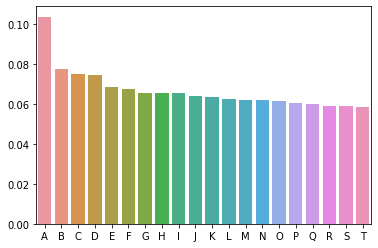

In [ ]:
import seaborn as sns
import string
import matplotlib.pyplot as plt
sns.barplot(x = list(string.ascii_uppercase[:20]), y = list(sorted_dict.values())[0:20])
plt.savefig('feature_importances.png')

In [ ]:
names[0] = "Feature 1"
names[1] = "Feature 2"
names[2] = "Feature 3"
names[3] = "Feature 4"
names[5] = "Feature 6"
names[10] = "Feature 11"
names[12] = "Feature 13"
names[15] = "Feature 16"
names[16] = "Feature 17"
names[17] = "Feature 18"

In [ ]:
#from imblearn.over_sampling import SMOTENC
#sampler = SMOTENC(categorical_features=indeces,k_neighbors=3)
#x_res,y_res = sampler.fit_resample(x_train,y_train)

In [ ]:
#from imblearn.over_sampling import RandomOverSampler
#sampler = RandomOverSampler()
#x_res,y_res = sampler.fit_resample(x_train,y_train)

In [ ]:
#from imblearn.under_sampling import RandomUnderSampler
#sampler = RandomUnderSampler()
#x_res,y_res = sampler.fit_resample(x_train,y_train)

In [ ]:
sweep_config = {
    'method':'bayes'
}

metric = {
    'name':'val_f1',
    'goal':'maximize'
}

sweep_config['metric'] = metric

parameters_dict = {
    'optomizer': {
        'values': ['adam', 'nadam', 'adamax', 'rmsprop', 'adagrad', 'adadelta']
    },
    'num_layers': {
        'values': [1, 2, 3, 4, 5]
    },
    'num_neurons': {
        'values':[1000, 1500, 2000, 2500, 3000,3500,4000,4500,5000]
    },
    'dropout_rate': {
        'distribution': 'q_uniform',
        'q': .1,
        'min': 0,
        'max': .5
    },
    'learning_rate': {
        'values':[0.01, 0.005, 0.001, 0.0005, 0.0001, 5e-05, 1e-05,5e-06, 1e-06,5e-07, 1e-07,5e-08, 1e-08]
    },
    'regularization_factor': {
        'values':[0.01, 0.005, 0.001, 0.0005, 0.0001, 5e-05, 1e-05,5e-06, 1e-06,5e-07, 1e-07,5e-08, 1e-08]
    },
    'regularization_type': {
        'values': ['l1', 'l2', 'l1_l2']
    },
    'activation_function': {
        'values': ['relu', 'leaky_relu', 'elu', 'selu', 'prelu', 'gelu', 'swish']
    },
    'alpha_value':{
        'distribution': 'uniform',
        'min': 0,
        'max': .5
    },
    'epochs':{
        'values':[100]
    }
}
sweep_config['parameters'] = parameters_dict

In [ ]:
sweep_id = wandb.sweep(sweep_config, project="keras_covid_project_smote")

Create sweep with ID: 3yaw2lxr
Sweep URL: https://wandb.ai/zachs_team/keras_covid_project_smote/sweeps/3yaw2lxr


In [ ]:
##Metrics
from keras import backend as K

#AUC
from tensorflow.keras.metrics import AUC
auc = AUC()

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
##Swish
#Swish activation function
from keras.backend import sigmoid
def swish(x, beta = 1):
    return (x * sigmoid(beta * x))

from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation
  
get_custom_objects().update({'swish': Activation(swish)})


In [ ]:
from tensorflow.keras.optimizers import Adagrad, Adam, Adamax, Nadam, RMSprop, Adadelta
def choose_optimizer(model,optimizer,learning_rate):
  if optimizer == 'adagrad':
      model.compile(optimizer=Adagrad(learning_rate),
          loss='binary_crossentropy',metrics=[f1,auc,'accuracy'])
  if optimizer == 'adadelta':
      model.compile(optimizer=Adadelta(learning_rate),
          loss='binary_crossentropy',metrics=[f1,auc,'accuracy'])
  if optimizer == 'rmsprop':
      model.compile(optimizer=RMSprop(learning_rate, momentum = .9),
          loss='binary_crossentropy',metrics=[f1,auc,'accuracy'])
  if optimizer == 'adam':
      model.compile(optimizer=Adam(learning_rate),
          loss='binary_crossentropy',metrics=[f1,auc,'accuracy'])
  if optimizer == 'nadam':
      model.compile(optimizer=Nadam(learning_rate),
          loss='binary_crossentropy',metrics=[f1,auc,'accuracy'])
  if optimizer == 'adamax':
      model.compile(optimizer=Adamax(learning_rate),
          loss='binary_crossentropy',metrics=[f1,auc,'accuracy'])
  return model

      
from keras.layers import Dropout,Dense,LeakyReLU,PReLU,Activation
def create_layers(model,dropout_rate,act_func,num_layers,num_neurons,regularization,alpha):
  for i in range(num_layers):
        if act_func == 'relu':
            model.add(Dropout(dropout_rate))
            model.add(Dense(num_neurons, kernel_regularizer=regularization))
            model.add(Activation('relu'))
        if act_func == 'leaky_relu':
            model.add(Dropout(dropout_rate))
            model.add(Dense(num_neurons, kernel_regularizer=regularization))
            model.add(LeakyReLU(alpha=alpha))
        if act_func == 'prelu':
            model.add(Dropout(dropout_rate))
            model.add(Dense(num_neurons, kernel_regularizer=regularization))
            model.add(PReLU())
        if act_func == 'selu':
            model.add(Dropout(dropout_rate))
            model.add(Dense(num_neurons ,
                kernel_initializer='lecun_normal',
                kernel_regularizer=regularization))
            model.add(Activation('selu'))
        if act_func == 'elu':
            model.add(Dropout(dropout_rate))
            model.add(Dense(num_neurons ,
                kernel_initializer='lecun_normal',
                kernel_regularizer=regularization))
            model.add(Activation('elu'))
        if act_func == 'gelu':
            model.add(Dropout(dropout_rate))
            model.add(Dense(num_neurons ,
                kernel_regularizer=regularization))
            model.add(Activation('gelu'))
        if act_func == 'swish':
            model.add(Dropout(dropout_rate))
            model.add(Dense(num_neurons ,
                kernel_regularizer=regularization))
            model.add(Activation('swish'))
  return model

from keras.regularizers import l1,l2,l1_l2
def regularization_wrapper(reg_type, reg_factor):
    if reg_type == 'l2':
        return l2(reg_factor)
    if reg_type == 'l1':
        return l1(reg_factor)
    if reg_type == 'l1_l2':
        return l1_l2(reg_factor,reg_factor)



In [ ]:
import gc
def train(config = None):
  from keras.layers import Dropout,Dense,LeakyReLU,PReLU,InputLayer, Activation
  from keras.regularizers import l1,l2,l1_l2
  from tensorflow.keras.optimizers import Adagrad, Adam, Adamax, Nadam, RMSprop, Adadelta
  from keras.models import Sequential
  from wandb.keras import WandbCallback
  # Initialize a new wandb run
  with wandb.init(config=config):
      config = wandb.config
      num_columns = 25008
      model= Sequential()
      model.add(InputLayer(input_shape = (num_columns)))
      model = create_layers(model,config.dropout_rate,config.activation_function,config.num_layers,
                    config.num_neurons,
                    regularization_wrapper(config.regularization_type,config.regularization_factor),
                    config.alpha_value)
      model = choose_optimizer(model,config.optomizer,config.learning_rate)
      model.add(Dropout(config.dropout_rate))
      model.add(Dense(1,activation='sigmoid'))
      print(model.summary())
      model.fit(x_smote,y_smote,epochs = config.epochs,
                callbacks = [WandbCallback()],
                validation_data=(x_val,y_val))
      del model
      gc.collect()
      
      


In [ ]:
wandb.agent(sweep_id, train, count=20)

wandb: Agent Starting Run: sbukasbv with config:
wandb: 	activation_function: gelu
wandb: 	alpha_value: 0.4921595360924587
wandb: 	dropout_rate: 0.1
wandb: 	epochs: 100
wandb: 	learning_rate: 0.001
wandb: 	num_layers: 4
wandb: 	num_neurons: 5000
wandb: 	optomizer: adadelta
wandb: 	regularization_factor: 0.0005
wandb: 	regularization_type: l1_l2


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 25008)             0         
                                                                 
 dense (Dense)               (None, 5000)              125045000 
                                                                 
 activation (Activation)     (None, 5000)              0         
                                                                 
 dropout_1 (Dropout)         (None, 5000)              0         
                                                                 
 dense_1 (Dense)             (None, 5000)              25005000  
                                                                 
 activation_1 (Activation)   (None, 5000)              0         
                                                                 
 dropout_2 (Dropout)         (None, 5000)              0

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


None
Epoch 1/100
380/380 [==============================] - 26s 61ms/step - loss: 904.0198 - f1: 0.7032 - auc: 0.7087 - accuracy: 0.6380 - val_loss: 894.2480 - val_f1: 0.3549 - val_auc: 0.8367 - val_accuracy: 0.4355 - _timestamp: 1656349088.0000 - _runtime: 25.0000
Epoch 2/100
380/380 [==============================] - 26s 69ms/step - loss: 884.5775 - f1: 0.7546 - auc: 0.8410 - accuracy: 0.6890 - val_loss: 874.8990 - val_f1: 0.3644 - val_auc: 0.8664 - val_accuracy: 0.4611 - _timestamp: 1656349111.0000 - _runtime: 48.0000
Epoch 3/100
380/380 [==============================] - 24s 63ms/step - loss: 865.3349 - f1: 0.7585 - auc: 0.8648 - accuracy: 0.6942 - val_loss: 855.7782 - val_f1: 0.3719 - val_auc: 0.8695 - val_accuracy: 0.4794 - _timestamp: 1656349137.0000 - _runtime: 74.0000
Epoch 4/100
380/380 [==============================] - 23s 62ms/step - loss: 846.3238 - f1: 0.7628 - auc: 0.8749 - accuracy: 0.7030 - val_loss: 836.8864 - val_f1: 0.3813 - val_auc: 0.8729 - val_accuracy: 0.4983 -

accuracy,▁▃▄▄▅▅▆▆▇▇▇▇▇▇████████████████████████▇▇
auc,▁▆▆▆▇▇▇▇▇▇▇▇▇██████████████████▇▇▇▇▇▇▇▇▇
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
f1,▁▃▄▅▅▆▆▆▇▇▇▇▇▇▇█████████████████████▇▇▇▇
loss,██▇▇▇▆▆▆▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▂▃▄▅▅▆▆▇▇▇▇████████████████████████████
val_auc,▁▅▆▆▆▆▇▇▇▆▆▆▆▆▆▆▆▆▆▆▆▇▇▇▇████████████▇▇▇
val_f1,▁▂▂▃▄▅▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇████████████████
val_loss,██▇▇▇▆▆▆▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.85608
auc,0.91705


wandb: Agent Starting Run: f9lsv4ai with config:
wandb: 	activation_function: gelu
wandb: 	alpha_value: 0.4478597005019634
wandb: 	dropout_rate: 0.4
wandb: 	epochs: 100
wandb: 	learning_rate: 0.0005
wandb: 	num_layers: 1
wandb: 	num_neurons: 3500
wandb: 	optomizer: adadelta
wandb: 	regularization_factor: 5e-05
wandb: 	regularization_type: l2


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 25008)             0         
                                                                 
 dense (Dense)               (None, 3500)              87531500  
                                                                 
 activation (Activation)     (None, 3500)              0         
                                                                 
 dropout_1 (Dropout)         (None, 3500)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 3501      
                                                                 
Total params: 87,535,001
Trainable params: 87,535,001
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
380/380 [==================

accuracy,▁▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇███████████████████
auc,▁▅▆▆▆▇▇▇▇▇▇▇▇▇▇▇████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
f1,▁▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇██▇██████████████
loss,█▆▅▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▄▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇██████████████████████
val_auc,▁▇██▇▇▇▇▆▆▆▆▆▆▆▆▆▆▆▆▆▅▆▆▆▅▆▆▆▆▆▆▆▆▆▆▆▆▆▆
val_f1,▁▅▆▇▇▇████▇▇▇▇█▇▇████████████▇▇▇▆▆▆▆▆▆▆▆
val_loss,█▆▅▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.90639
auc,0.96596


wandb: Agent Starting Run: lt08804y with config:
wandb: 	activation_function: prelu
wandb: 	alpha_value: 0.06385109826725666
wandb: 	dropout_rate: 0.30000000000000004
wandb: 	epochs: 100
wandb: 	learning_rate: 0.0001
wandb: 	num_layers: 3
wandb: 	num_neurons: 4500
wandb: 	optomizer: adagrad
wandb: 	regularization_factor: 0.0005
wandb: 	regularization_type: l1_l2


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 25008)             0         
                                                                 
 dense (Dense)               (None, 4500)              112540500 
                                                                 
 p_re_lu (PReLU)             (None, 4500)              4500      
                                                                 
 dropout_1 (Dropout)         (None, 4500)              0         
                                                                 
 dense_1 (Dense)             (None, 4500)              20254500  
                                                                 
 p_re_lu_1 (PReLU)           (None, 4500)              4500      
                                                                 
 dropout_2 (Dropout)         (None, 4500)              0

accuracy,▁▅▆▆▇▇▇▇▇▇▇▇▇▇▇█████████████████████████
auc,▁▅▆▇▇▇▇▇▇▇▇▇████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
f1,▁▄▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇██████████████████████
loss,███▇▇▇▇▇▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁
val_accuracy,▁▄▅▅▅▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇█▇█████████████████
val_auc,▁▅▆▅▆▆▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇█▇▇██████████
val_f1,▁▄▄▅▅▆▆▆▇▇▇▇▇▇▇▇▇▇▇█████████▇███████████
val_loss,███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁
accuracy,0.91833
auc,0.97399


wandb: Agent Starting Run: id26bzh5 with config:
wandb: 	activation_function: swish
wandb: 	alpha_value: 0.015533506815625098
wandb: 	dropout_rate: 0.1
wandb: 	epochs: 100
wandb: 	learning_rate: 5e-07
wandb: 	num_layers: 3
wandb: 	num_neurons: 2500
wandb: 	optomizer: adagrad
wandb: 	regularization_factor: 1e-08
wandb: 	regularization_type: l1_l2


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 25008)             0         
                                                                 
 dense (Dense)               (None, 2500)              62522500  
                                                                 
 activation (Activation)     (None, 2500)              0         
                                                                 
 dropout_1 (Dropout)         (None, 2500)              0         
                                                                 
 dense_1 (Dense)             (None, 2500)              6252500   
                                                                 
 activation_1 (Activation)   (None, 2500)              0         
                                                                 
 dropout_2 (Dropout)         (None, 2500)              0

accuracy,▁▂▂▁▃▃▂▂▂▄▃▄▃▄▆▄▄▄▅▄▆▅▆▅▅▆▆▆▇▆▇▅█▇▇▇██▇▇
auc,▅▁▂▁▁▂▂▂▂▂▃▃▃▄▄▄▄▄▄▄▅▅▅▅▆▆▆▆▆▆▇▆▇▇▇▇▇▇██
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
f1,▁▂▁▁▃▃▂▂▂▄▃▄▄▄▅▄▄▅▅▄▅▆▇▆▆▆▇▇▇▇█▆█▇▇▇████
loss,██▇█▇▇▇▇▇▆▆▆▆▅▅▅▅▅▅▅▄▄▄▄▄▃▄▄▃▃▂▃▂▂▂▂▂▂▁▁
val_accuracy,▇▇▆▆▇▇▆▇▅▅▄▄▃▃▃▃▃▃▃▂▂▁▁▂▃▃▄▄▃▄▄▅▅▅▆▆▆▇▇█
val_auc,▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇██████
val_f1,▁▁▁▁▂▂▃▄▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇███
val_loss,▁▁▁▂▂▂▂▂▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇████
accuracy,0.56916
auc,0.69197


wandb: Agent Starting Run: dhugb9w7 with config:
wandb: 	activation_function: swish
wandb: 	alpha_value: 0.17063798287560922
wandb: 	dropout_rate: 0.2
wandb: 	epochs: 100
wandb: 	learning_rate: 5e-05
wandb: 	num_layers: 5
wandb: 	num_neurons: 5000
wandb: 	optomizer: adadelta
wandb: 	regularization_factor: 5e-06
wandb: 	regularization_type: l1_l2


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 25008)             0         
                                                                 
 dense (Dense)               (None, 5000)              125045000 
                                                                 
 activation (Activation)     (None, 5000)              0         
                                                                 
 dropout_1 (Dropout)         (None, 5000)              0         
                                                                 
 dense_1 (Dense)             (None, 5000)              25005000  
                                                                 
 activation_1 (Activation)   (None, 5000)              0         
                                                                 
 dropout_2 (Dropout)         (None, 5000)              0

accuracy,▁▂▃▄▄▅▅▆▆▆▇▇▇▇▇▇▇▇▇▇▇█▇▇▇███████████████
auc,▁▂▃▃▃▄▄▄▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇██████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
f1,▁▂▃▄▅▆▆▆▇▇▇▇▇███████████████████████████
loss,████▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
val_accuracy,█▆▅▃▃▃▂▂▁▂▁▁▁▁▁▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇██
val_auc,▁▁▂▂▃▄▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇███████████████████
val_f1,▁▃▅▅▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇███████████████
val_loss,█████▇▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁
accuracy,0.68368
auc,0.86761


wandb: Agent Starting Run: suff6jdk with config:
wandb: 	activation_function: leaky_relu
wandb: 	alpha_value: 0.3439682510311136
wandb: 	dropout_rate: 0.4
wandb: 	epochs: 100
wandb: 	learning_rate: 5e-05
wandb: 	num_layers: 4
wandb: 	num_neurons: 3000
wandb: 	optomizer: adam
wandb: 	regularization_factor: 5e-08
wandb: 	regularization_type: l1


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 25008)             0         
                                                                 
 dense (Dense)               (None, 3000)              75027000  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 3000)              0         
                                                                 
 dropout_1 (Dropout)         (None, 3000)              0         
                                                                 
 dense_1 (Dense)             (None, 3000)              9003000   
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 3000)              0         
                                                                 
 dropout_2 (Dropout)         (None, 3000)              0

accuracy,▁▄▆▆▇▇▇▇▇▇██████████████████████████████
auc,▁▆▇█████████████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
f1,▁▄▆▆▇▇▇▇▇▇██████████████████████████████
loss,█▅▃▃▂▂▂▂▂▂▂▂▂▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▇▇▇▄▇█▇▇▆▆▇▇▇▆▇▅▃▇▆▇█▆█▇▆█▇▆█▆▇▇▇▆▆▇▇▇▅
val_auc,██▇█▇▅▅▆▄▅▃▄▂▁▇▄▄▅▄▅▅▃▅▂▃▅▁▂▄▄▃▄▃▃▄▃▄▂▂▅
val_f1,▄▅▅█▇▇█▆▆█▃▆▃▁█▅▆▄▆▇▇▆▆▃▅▇▂▄▅▅▃▇▅▆▆▃▇▂▄▆
val_loss,▃▁▂▂▄▄▄▃▄▆▄▅▅▇▄▆▇▇▇▆▆▆▅▆▆▇█▆▆▆██▇▇█▆▇▇██
accuracy,0.99432
auc,0.99953


wandb: Agent Starting Run: nvwn427w with config:
wandb: 	activation_function: prelu
wandb: 	alpha_value: 0.43985373925668886
wandb: 	dropout_rate: 0.30000000000000004
wandb: 	epochs: 100
wandb: 	learning_rate: 0.0005
wandb: 	num_layers: 3
wandb: 	num_neurons: 4500
wandb: 	optomizer: adadelta
wandb: 	regularization_factor: 5e-07
wandb: 	regularization_type: l1_l2


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 25008)             0         
                                                                 
 dense (Dense)               (None, 4500)              112540500 
                                                                 
 p_re_lu (PReLU)             (None, 4500)              4500      
                                                                 
 dropout_1 (Dropout)         (None, 4500)              0         
                                                                 
 dense_1 (Dense)             (None, 4500)              20254500  
                                                                 
 p_re_lu_1 (PReLU)           (None, 4500)              4500      
                                                                 
 dropout_2 (Dropout)         (None, 4500)              0

accuracy,▁▅▆▆▇▇▇▇▇▇▇▇▇▇▇█████████████████████████
auc,▁▅▆▇▇▇▇▇▇▇▇█████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
f1,▁▄▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇█████████████████████
loss,█▇▆▅▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▄▅▆▆▆▇▇▇▇▇▇▇▇▇▇▇███████████████████████
val_auc,▁▅▆▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇████████████
val_f1,▁▄▅▅▆▆▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇█████████████
val_loss,█▇▆▅▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.93043
auc,0.98079


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: bg5mpyb0 with config:
wandb: 	activation_function: leaky_relu
wandb: 	alpha_value: 0.2970392980098799
wandb: 	dropout_rate: 0.4
wandb: 	epochs: 100
wandb: 	learning_rate: 5e-05
wandb: 	num_layers: 5
wandb: 	num_neurons: 2500
wandb: 	optomizer: adam
wandb: 	regularization_factor: 1e-07
wandb: 	regularization_type: l2


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 25008)             0         
                                                                 
 dense (Dense)               (None, 2500)              62522500  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 2500)              0         
                                                                 
 dropout_1 (Dropout)         (None, 2500)              0         
                                                                 
 dense_1 (Dense)             (None, 2500)              6252500   
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 2500)              0         
                                                                 
 dropout_2 (Dropout)         (None, 2500)              0

accuracy,▁▅▆▆▇▇▇▇▇█▇▇████████████████████████████
auc,▁▆▇█████████████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
f1,▁▅▆▆▇▇▇▇▇█▇█████████████████████████████
loss,█▄▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▂▄▁█▄▅▆▄▃▅▄▆▅▅█▂▅▅▂▄▆▆▅▇▇▂▇▄▆▆▅▅▃▅▄▄▃▄▆▃
val_auc,▇██▆▇▇▅▄▆▄▄▅▄▄▃▄▄▃▄▅▃▄▄▄▁▅▃▃▁▄▄▂▄▃▃▁▄▅▃▄
val_f1,▄▄█▇█▇▅▁▇▃▃▃▃▃▆▆▄▂▇▅▄▆▃▅▄▆▅▃▂▆▆▄▅▄▄▁▄▅▅▅
val_loss,▁▁▁▂▂▂▃▃▃▄▄▃▄▄▅▆▃▄▆▅▄▅▄▅█▅▅▅▇▄▆▆▅▅▆▇▆▅▆▆
accuracy,0.99613
auc,0.99962


wandb: Agent Starting Run: tvx4pdz9 with config:
wandb: 	activation_function: elu
wandb: 	alpha_value: 0.3333675390626839
wandb: 	dropout_rate: 0.4
wandb: 	epochs: 100
wandb: 	learning_rate: 1e-06
wandb: 	num_layers: 5
wandb: 	num_neurons: 3500
wandb: 	optomizer: nadam
wandb: 	regularization_factor: 1e-07
wandb: 	regularization_type: l2


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 25008)             0         
                                                                 
 dense (Dense)               (None, 3500)              87531500  
                                                                 
 activation (Activation)     (None, 3500)              0         
                                                                 
 dropout_1 (Dropout)         (None, 3500)              0         
                                                                 
 dense_1 (Dense)             (None, 3500)              12253500  
                                                                 
 activation_1 (Activation)   (None, 3500)              0         
                                                                 
 dropout_2 (Dropout)         (None, 3500)              0

accuracy,▁▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇█▇▇█████████████████████
auc,▁▆▇▇▇▇▇▇▇▇██████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
f1,▁▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇████████████████████
loss,█▅▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▄▆▆▆▇▇▇▇▇▇▇▇█▇▇█▇███▇▇██▇███▇█▇▇█▇█▇▇▇▇
val_auc,█▇▇▇▇▇███▇▇▇▇▇▇▇▆▆▅▅▅▅▅▄▅▅▄▃▃▃▃▂▄▃▂▂▂▂▁▁
val_f1,▁▃▃▄▄▄▅▅▅▅▆▅▆▆▆▆▇▆▇▇▇▇▇█▇▇▇▇▇▆▇▆▇▇▇▆▆▄▅▄
val_loss,▅▂▁▁▁▁▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▅▅▅▆▆▆▆▆▆▆▇▇▇██
accuracy,0.96978
auc,0.99582


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 430j9dma with config:
wandb: 	activation_function: elu
wandb: 	alpha_value: 0.2093795011208321
wandb: 	dropout_rate: 0.5
wandb: 	epochs: 100
wandb: 	learning_rate: 0.01
wandb: 	num_layers: 3
wandb: 	num_neurons: 4500
wandb: 	optomizer: adagrad
wandb: 	regularization_factor: 0.001
wandb: 	regularization_type: l1_l2


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 25008)             0         
                                                                 
 dense (Dense)               (None, 4500)              112540500 
                                                                 
 activation (Activation)     (None, 4500)              0         
                                                                 
 dropout_1 (Dropout)         (None, 4500)              0         
                                                                 
 dense_1 (Dense)             (None, 4500)              20254500  
                                                                 
 activation_1 (Activation)   (None, 4500)              0         
                                                                 
 dropout_2 (Dropout)         (None, 4500)              0

accuracy,▁▁▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇██▇▇▇▇███▇▇██████
auc,▁▁▅▆▆▇▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇████▇▇█████▇███████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
f1,▁▁▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇███▇▇██████
loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▄▂▆▅▇▇▆▇▅▄▅▇▆▆▇▇▆▇▆▆█▆██▇▇█▇▆▇▅█▇█▅▆▇▅
val_auc,█▆▆▇▃▅▄▄▂▂▆▅▅▅▅▅▅▆▃▁▄▄▄▆▃▃▄▄▃▁▃▂▅▃▄▄▄▃▄▄
val_f1,█▆▅▆▁▅▃▃▂▃▇▅▅▄▆▅▅█▅▃▅▅▅▇▄▁▅▅▅▃▅▆▇▄▅▄▄▄▅▇
val_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.92121
auc,0.96908


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 94ycasap with config:
wandb: 	activation_function: relu
wandb: 	alpha_value: 0.3378178772822781
wandb: 	dropout_rate: 0.30000000000000004
wandb: 	epochs: 100
wandb: 	learning_rate: 1e-05
wandb: 	num_layers: 3
wandb: 	num_neurons: 4000
wandb: 	optomizer: adamax
wandb: 	regularization_factor: 5e-05
wandb: 	regularization_type: l1_l2


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 25008)             0         
                                                                 
 dense (Dense)               (None, 4000)              100036000 
                                                                 
 activation (Activation)     (None, 4000)              0         
                                                                 
 dropout_1 (Dropout)         (None, 4000)              0         
                                                                 
 dense_1 (Dense)             (None, 4000)              16004000  
                                                                 
 activation_1 (Activation)   (None, 4000)              0         
                                                                 
 dropout_2 (Dropout)         (None, 4000)              0

accuracy,▁▄▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇███████████████████
auc,▁▆▆▇▇▇▇▇▇▇▇█████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
f1,▁▄▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇████████████████
loss,█▆▅▅▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▃▄▄▅▃▄▅▅▅▅▅▇▅▅▆▄▅▇▆▇▇▆▇▇▇▇▇▇▇▇▇▇▇▇█▇██▇
val_auc,▁▂▅▆▇▇▇▇▇█▇█▇█▇▇██▇▇▆▇▇▆▇▇▇▇▆▇▇█▇▇▇▇▇▇▇█
val_f1,▁▃▄▅▅▃▄▆▆▆▅▅▇▅▅▆▄▅▇▅▇█▅▇▇▇▇▇▆▆▇▇▇▇▇▇▇██▇
val_loss,█▆▅▅▅▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.97654
auc,0.99756


wandb: Agent Starting Run: g8sz18zb with config:
wandb: 	activation_function: relu
wandb: 	alpha_value: 0.40204661040702727
wandb: 	dropout_rate: 0.2
wandb: 	epochs: 100
wandb: 	learning_rate: 0.01
wandb: 	num_layers: 3
wandb: 	num_neurons: 3000
wandb: 	optomizer: nadam
wandb: 	regularization_factor: 0.0001
wandb: 	regularization_type: l1_l2


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 25008)             0         
                                                                 
 dense (Dense)               (None, 3000)              75027000  
                                                                 
 activation (Activation)     (None, 3000)              0         
                                                                 
 dropout_1 (Dropout)         (None, 3000)              0         
                                                                 
 dense_1 (Dense)             (None, 3000)              9003000   
                                                                 
 activation_1 (Activation)   (None, 3000)              0         
                                                                 
 dropout_2 (Dropout)         (None, 3000)              0

accuracy,▁▇▇█████████████████████████████████████
auc,▁▇██████████████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
f1,▁▇▇█████████████████████████████████████
loss,█▇▅▄▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▆▆▇▇▆▆▅▇▇▄▆▄▁▆▇▆▇▇█▇▇▄▅▇▇▇▇▇▆▄█▇▇▆▇▆▅▇▅▆
val_auc,▁▄▆▅▇▆▅▆▇▆▆▆▂▇▇▆▆▆▇▆█▆▆▇▇▂▇▇▆▆█▆▆▆█▅▅▅▅▆
val_f1,▂▃▆▄▁▆▆▄▅▇▇█▇█▄█▇▅▇▆▇▇███▄▆█▄▇▇▅█▆▅▆▅▅▇▇
val_loss,██▆▅▄▄▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.9124
auc,0.97107


wandb: Agent Starting Run: czpxvedv with config:
wandb: 	activation_function: leaky_relu
wandb: 	alpha_value: 0.31098826932757356
wandb: 	dropout_rate: 0.30000000000000004
wandb: 	epochs: 100
wandb: 	learning_rate: 1e-05
wandb: 	num_layers: 1
wandb: 	num_neurons: 5000
wandb: 	optomizer: adadelta
wandb: 	regularization_factor: 5e-05
wandb: 	regularization_type: l1_l2


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 25008)             0         
                                                                 
 dense (Dense)               (None, 5000)              125045000 
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 5000)              0         
                                                                 
 dropout_1 (Dropout)         (None, 5000)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 5001      
                                                                 
Total params: 125,050,001
Trainable params: 125,050,001
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
380/380 [================

accuracy,▁▂▃▃▄▄▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇██████████████
auc,▂▁▂▃▄▄▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇██████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
f1,▁▂▃▄▅▅▆▆▆▇▇▇▇▇▇▇▇▇██▇███████████████████
loss,██▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁
val_accuracy,▄▃▂▂▂▁▁▁▁▁▁▁▂▂▂▃▃▃▄▄▄▅▅▅▆▆▆▆▆▇▇▇▇▇▇█████
val_auc,▁▂▄▄▅▆▆▆▇▇▇▇▇███████████████████████████
val_f1,▁▂▃▄▅▅▅▅▅▅▅▅▆▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇█████████
val_loss,██████▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
accuracy,0.81722
auc,0.90112


wandb: Agent Starting Run: nzy1zfxm with config:
wandb: 	activation_function: relu
wandb: 	alpha_value: 0.4996336220214052
wandb: 	dropout_rate: 0.30000000000000004
wandb: 	epochs: 100
wandb: 	learning_rate: 5e-05
wandb: 	num_layers: 5
wandb: 	num_neurons: 5000
wandb: 	optomizer: adagrad
wandb: 	regularization_factor: 5e-05
wandb: 	regularization_type: l1_l2


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 25008)             0         
                                                                 
 dense (Dense)               (None, 5000)              125045000 
                                                                 
 activation (Activation)     (None, 5000)              0         
                                                                 
 dropout_1 (Dropout)         (None, 5000)              0         
                                                                 
 dense_1 (Dense)             (None, 5000)              25005000  
                                                                 
 activation_1 (Activation)   (None, 5000)              0         
                                                                 
 dropout_2 (Dropout)         (None, 5000)              0

accuracy,▁▂▂▃▄▄▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇███████████████
auc,▁▁▂▃▄▄▅▅▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇█████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
f1,▁▂▃▄▅▅▅▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇████████████████
loss,████▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁
val_accuracy,▇▆▃▃▂▂▂▁▁▁▁▁▂▂▃▃▄▅▅▆▆▆▇▇▇▇▇▇████████████
val_auc,▁▅▇▇▇███████████████████████████████████
val_f1,▁▅▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇████████████████
val_loss,████▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁
accuracy,0.90392
auc,0.96528


wandb: Agent Starting Run: ak7kb41o with config:
wandb: 	activation_function: relu
wandb: 	alpha_value: 0.4823823070153497
wandb: 	dropout_rate: 0.5
wandb: 	epochs: 100
wandb: 	learning_rate: 1e-06
wandb: 	num_layers: 4
wandb: 	num_neurons: 3000
wandb: 	optomizer: adam
wandb: 	regularization_factor: 5e-05
wandb: 	regularization_type: l1_l2


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 25008)             0         
                                                                 
 dense (Dense)               (None, 3000)              75027000  
                                                                 
 activation (Activation)     (None, 3000)              0         
                                                                 
 dropout_1 (Dropout)         (None, 3000)              0         
                                                                 
 dense_1 (Dense)             (None, 3000)              9003000   
                                                                 
 activation_1 (Activation)   (None, 3000)              0         
                                                                 
 dropout_2 (Dropout)         (None, 3000)              0

accuracy,▁▃▅▆▇▇▇▇▇▇▇▇▇███████████████████████████
auc,▁▂▅▆▇▇▇▇████████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
f1,▁▃▅▆▇▇▇▇▇▇▇▇████████████████████████████
loss,██▇▇▆▆▅▅▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
val_accuracy,▁▃▅▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇████████████████████
val_auc,▁▅▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇████████████
val_f1,▁▃▄▅▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇██████████████████
val_loss,██▇▇▆▆▅▅▅▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
accuracy,0.93603
auc,0.98189


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: b9kht09y with config:
wandb: 	activation_function: leaky_relu
wandb: 	alpha_value: 0.1923981891090668
wandb: 	dropout_rate: 0.4
wandb: 	epochs: 100
wandb: 	learning_rate: 5e-05
wandb: 	num_layers: 4
wandb: 	num_neurons: 3500
wandb: 	optomizer: adam
wandb: 	regularization_factor: 0.005
wandb: 	regularization_type: l2


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 25008)             0         
                                                                 
 dense (Dense)               (None, 3500)              87531500  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 3500)              0         
                                                                 
 dropout_1 (Dropout)         (None, 3500)              0         
                                                                 
 dense_1 (Dense)             (None, 3500)              12253500  
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 3500)              0         
                                                                 
 dropout_2 (Dropout)         (None, 3500)              0

accuracy,▁▄▅▅▅▅▆▆▆▇▇▇▇▇▇▇▇▇▇█████████████████████
auc,▁▆▇▇▇▇▇▇▇▇██████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
f1,▁▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇█▇█████████████████████
loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▅▆▇▅██▆▇▆▆▄█▇▇▆▆▅▇█▇▇▇▇▇▇▇▇▅▇▇██▇▆▇▆▇█▆
val_auc,▄▆▇▇▇▇█▇▇▇▇▇▆▇▇▆▆▆▇▆▆▇▆▅▄▅▅▆▆▆▄▄▄▇▃▅▆▁▃▄
val_f1,▅▇▆▁▇▅▅▇▁▇▅█▄▃▆▅▇▅▆▆▆▅▆▁▃▆▅▄▆▅▃▅▆▇▄▅▆▁▅▅
val_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.98172
auc,0.99793


wandb: Agent Starting Run: s69qj7ya with config:
wandb: 	activation_function: relu
wandb: 	alpha_value: 0.3416086603409366
wandb: 	dropout_rate: 0.4
wandb: 	epochs: 100
wandb: 	learning_rate: 0.0001
wandb: 	num_layers: 2
wandb: 	num_neurons: 2500
wandb: 	optomizer: nadam
wandb: 	regularization_factor: 1e-05
wandb: 	regularization_type: l1_l2


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 25008)             0         
                                                                 
 dense (Dense)               (None, 2500)              62522500  
                                                                 
 activation (Activation)     (None, 2500)              0         
                                                                 
 dropout_1 (Dropout)         (None, 2500)              0         
                                                                 
 dense_1 (Dense)             (None, 2500)              6252500   
                                                                 
 activation_1 (Activation)   (None, 2500)              0         
                                                                 
 dropout_2 (Dropout)         (None, 2500)              0

accuracy,▁▄▅▆▆▇▇▇▇███████████████████████████████
auc,▁▆▇▇████████████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
f1,▁▄▅▆▆▆▇▇▇███████████████████████████████
loss,█▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▅▆▇▁▄▅▅█▇▅█▄▇▆█▇▅▆▇▇▇▇▇▇█▇█▅▆▅▇▇▆▇▆▇▆▆▆
val_auc,▆▇█▇█▇▅▆▄▃▅▆▆▆▅▆▅▆▃▆▄▅▅▄▂▅▄▃▄▄▄▄▃▁▂▅▃▃▂▁
val_f1,▇█▆▄▇▇▄▇▃▃▅▅▆▇▆▆▅▅▃▇▄▆▆▅▃▆▅▆▃▅▄▆▄▁▄▇▄▃▃▂
val_loss,█▅▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▁▁▁▁▁
accuracy,0.99448
auc,0.99985


wandb: Agent Starting Run: w7ib2l03 with config:
wandb: 	activation_function: relu
wandb: 	alpha_value: 0.48699995296228105
wandb: 	dropout_rate: 0.2
wandb: 	epochs: 100
wandb: 	learning_rate: 5e-07
wandb: 	num_layers: 4
wandb: 	num_neurons: 4500
wandb: 	optomizer: adamax
wandb: 	regularization_factor: 0.005
wandb: 	regularization_type: l1_l2


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 25008)             0         
                                                                 
 dense (Dense)               (None, 4500)              112540500 
                                                                 
 activation (Activation)     (None, 4500)              0         
                                                                 
 dropout_1 (Dropout)         (None, 4500)              0         
                                                                 
 dense_1 (Dense)             (None, 4500)              20254500  
                                                                 
 activation_1 (Activation)   (None, 4500)              0         
                                                                 
 dropout_2 (Dropout)         (None, 4500)              0

accuracy,▂▂▁▁▁▁▁▁▁▁▁▁▁▂▂▂▃▃▄▄▄▅▅▆▇█▆▃▁▁▁▁▁▁▁▁▁▁▁▁
auc,█▃▃▂▂▁▁▁▁▂▁▁▂▃▂▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
f1,▄▄▅▅▅▅▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇███▆▃▁▁▁▁▁▁▁▁▁▁▁▁
loss,██▇▇▇▆▆▆▅▅▅▅▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
val_accuracy,▆▆▄▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▂▂▂▃▃▄▆██████████████
val_auc,▄▃▂▂▁▂▁▁▂▃▃▄▆████▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
val_f1,▄▄▄▄▄▄▄▄▄▄▄▅▅▅▅▅▅▅▅▆▆▆▆▆▇██▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,██▇▇▇▆▆▆▅▅▅▅▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
accuracy,0.5
auc,0.5


wandb: Agent Starting Run: t44woaya with config:
wandb: 	activation_function: leaky_relu
wandb: 	alpha_value: 0.1948546033034144
wandb: 	dropout_rate: 0.4
wandb: 	epochs: 100
wandb: 	learning_rate: 5e-05
wandb: 	num_layers: 5
wandb: 	num_neurons: 3000
wandb: 	optomizer: adamax
wandb: 	regularization_factor: 0.0001
wandb: 	regularization_type: l1_l2


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 25008)             0         
                                                                 
 dense (Dense)               (None, 3000)              75027000  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 3000)              0         
                                                                 
 dropout_1 (Dropout)         (None, 3000)              0         
                                                                 
 dense_1 (Dense)             (None, 3000)              9003000   
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 3000)              0         
                                                                 
 dropout_2 (Dropout)         (None, 3000)              0

accuracy,▁▅▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█▇█▇██████████
auc,▁▆▇▇▇▇▇▇▇▇█▇████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
f1,▁▅▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█▇▇▇██████████
loss,█▅▄▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▄▄▆▃▇▆▆▇▇▇█▇▇▇█▇▇▇▇█▇█▇████▇█▇████▇██▇█
val_auc,▁▄▄▅▅▅▄▅▅▅▆▆▅▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇███████████
val_f1,▁▄▄▅▃█▆▅▇▇▇▆▆▇▆▅▆▇▇▆▆▅▅▇▂▄▅▇▅█▆▃▅▅▂▄▅▃▂▅
val_loss,█▆▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.95373
auc,0.99112


wandb: Agent Starting Run: f3hlijxn with config:
wandb: 	activation_function: elu
wandb: 	alpha_value: 0.32546741788452194
wandb: 	dropout_rate: 0.4
wandb: 	epochs: 100
wandb: 	learning_rate: 1e-06
wandb: 	num_layers: 4
wandb: 	num_neurons: 2500
wandb: 	optomizer: adamax
wandb: 	regularization_factor: 1e-08
wandb: 	regularization_type: l2


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 25008)             0         
                                                                 
 dense (Dense)               (None, 2500)              62522500  
                                                                 
 activation (Activation)     (None, 2500)              0         
                                                                 
 dropout_1 (Dropout)         (None, 2500)              0         
                                                                 
 dense_1 (Dense)             (None, 2500)              6252500   
                                                                 
 activation_1 (Activation)   (None, 2500)              0         
                                                                 
 dropout_2 (Dropout)         (None, 2500)              0

accuracy,▁▅▆▆▇▇▇▇▇▇▇▇▇▇██████████████████████████
auc,▁▅▆▆▇▇▇▇▇▇▇▇████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
f1,▁▅▆▆▆▇▇▇▇▇▇▇▇▇█▇▇███████████████████████
loss,█▆▅▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▄▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇███████████████████████
val_auc,▁▆▅▅▅▄▄▄▅▄▄▄▅▄▅▅▅▅▆▆▆▆▆▇▇▇▇▆▇▆▇▇▇▇▇▇████
val_f1,▁▆▆▇▇▇▇▇▇▇▇▇▇▆▆▆▇▆▇▇▇▇▇▇▇▇▇▇▇▆▇▇▇▇▇▇▇▇▇█
val_loss,█▆▄▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.92162
auc,0.97609


Here is the results of sweeping for every combination of data, please view the WandB results
Raw training data:
https://wandb.ai/zachs_team/keras_covid_project_imb?workspace=user-zfarahany
Weighted training:
https://wandb.ai/zachs_team/keras_covid_project_weights?workspace=user-zfarahany
Oversampled:
https://wandb.ai/zachs_team/keras_covid_project_oversampling?workspace=user-zfarahany
Undersampled:
https://wandb.ai/zachs_team/keras_covid_project_undersampling?workspace=user-zfarahany
SMOTE-NC data:
https://wandb.ai/zachs_team/keras_covid_project_smote?workspace=user-zfarahany

In [ ]:
##Raw training data model##

from keras.layers import Dropout,Dense,LeakyReLU,PReLU,InputLayer, Activation
from keras.regularizers import l1,l2,l1_l2
from tensorflow.keras.optimizers import Adagrad, Adam, Adamax, Nadam, RMSprop, Adadelta
from keras.models import Sequential

#parameters
dropout_rate = .3
activation_function = 'leaky_relu'
num_layers = 3
num_neurons = 4000
alpha_value = .04
regularization_type = 'l1_l2'
regularization_factor = 5e-5
optomizer = 'adamax'
learning_rate = 1e-5
epochs = 100

num_columns = 25008
model1= Sequential()
model1.add(InputLayer(input_shape = (num_columns)))
model1 = create_layers(model1,dropout_rate,activation_function,num_layers,
    num_neurons,
    regularization_wrapper(regularization_type,regularization_factor),
    alpha_value)
model1 = choose_optimizer(model1,optomizer,learning_rate)
model1.add(Dropout(dropout_rate))
model1.add(Dense(1,activation='sigmoid'))
print(model1.summary())
model1.fit(x_train,y_train,epochs = epochs,
          validation_data=(x_val,y_val))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 25008)             0         
                                                                 
 dense (Dense)               (None, 4000)              100036000 
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 4000)              0         
                                                                 
 dropout_1 (Dropout)         (None, 4000)              0         
                                                                 
 dense_1 (Dense)             (None, 4000)              16004000  
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 4000)              0         
                                                                 
 dropout_2 (Dropout)         (None, 4000)              0

In [ ]:
def gen_roc_auc(model, x,y):
  from sklearn.metrics import roc_curve,roc_auc_score
  y_proba = model.predict(x)
  fpr , tpr , thresholds = roc_curve(y, y_proba)
  return fpr, tpr, thresholds

fpr1, tpr1, thresh1 = gen_roc_auc(model1,x_test,y_test)
fpr2,tpr2,thresh2 =  gen_roc_auc(model2,x_test,y_test)
fpr3,tpr3,thresh3 =  gen_roc_auc(model3,x_test,y_test)
fpr4,tpr4,thresh4 =  gen_roc_auc(model4,x_test,y_test)
fpr5,tpr5,thresh5 =  gen_roc_auc(model5,x_test,y_test)

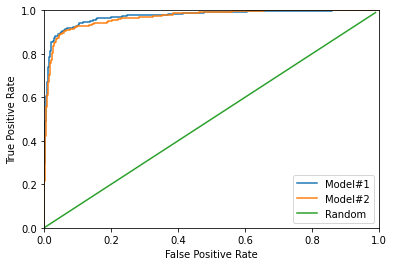

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(fpr1,tpr1) 
plt.plot(fpr2,tpr2) 
plt.plot(np.arange(0,1,.01),np.arange(0,1,.01))
plt.axis([0,1,0,1])
plt.legend(["Model#1","Model#2", "Random"])
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.show()    
 

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, precision_score, recall_score
#Eval test set
def eval_model(model,x_val,y_val,x_test,y_test):

  y_pred = model.predict(x_val)
  y_pred = np.round(y_pred)
  print("Validation scores")
  print("F1 score " +str(f1_score(y_pred,y_val)))
  print("Accuracy score " +str(accuracy_score(y_pred,y_val)))
  print("AUC score " +str(roc_auc_score(y_pred,y_val)))


  y_pred = model.predict(x_test)
  y_pred = np.round(y_pred)
  print("Test scores")
  print("F1 score " +str(f1_score(y_pred,y_test)))
  print("Accuracy score " +str(accuracy_score(y_pred,y_test)))
  print("Precision score " +str(precision_score(y_pred,y_test)))
  print("Recall score " +str(recall_score(y_pred,y_test)))
  print("AUC score " +str(roc_auc_score(y_pred,y_test)))

In [ ]:
eval_model(x_val,y_val,x_test,y_test)

Validation scores
F1 score 0.6239168110918544
Accuracy score 0.8793103448275862
AUC score 0.7779789654789655
Test scores
F1 score 0.8579465541490858
Accuracy score 0.9550511793502447
Precision score 0.8664772727272727
Recall score 0.8495821727019499
AUC score 0.9123440524526699


In [ ]:
class_weights = {
    0:1,
    1:6073/1117
}

In [ ]:
##Raw training with weights data model##
from keras.layers import Dropout,Dense,LeakyReLU,PReLU,InputLayer, Activation
from keras.regularizers import l1,l2,l1_l2
from tensorflow.keras.optimizers import Adagrad, Adam, Adamax, Nadam, RMSprop, Adadelta
from keras.models import Sequential

#parameters
dropout_rate = .5
activation_function = 'elu'
num_layers = 1
num_neurons = 2000
alpha_value = .038
regularization_type = 'l2'
regularization_factor = 1e-3
optomizer = 'adam'
learning_rate = 5e-6
epochs = 100

num_columns = 25008
model2= Sequential()
model2.add(InputLayer(input_shape = (num_columns)))
model2 = create_layers(model2,dropout_rate,activation_function,num_layers,
    num_neurons,
    regularization_wrapper(regularization_type,regularization_factor),
    alpha_value)
model2 = choose_optimizer(model2,optomizer,learning_rate)
model2.add(Dropout(dropout_rate))
model2.add(Dense(1,activation='sigmoid'))
print(model2.summary())
model2.fit(x_train,y_train,epochs = epochs,
          validation_data=(x_val,y_val),
          class_weight = class_weights)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_4 (Dropout)         (None, 25008)             0         
                                                                 
 dense_4 (Dense)             (None, 2000)              50018000  
                                                                 
 activation_1 (Activation)   (None, 2000)              0         
                                                                 
 dropout_5 (Dropout)         (None, 2000)              0         
                                                                 
 dense_5 (Dense)             (None, 1)                 2001      
                                                                 
Total params: 50,020,001
Trainable params: 50,020,001
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
225/225 [================

In [ ]:
eval_model(x_val,y_val,x_test,y_test)

Validation scores
F1 score 0.6406015037593984
Accuracy score 0.8670745272525028
AUC score 0.7573717178393318
Test scores
F1 score 0.7911001236093942
Accuracy score 0.9247886070315977
Precision score 0.9090909090909091
Recall score 0.700218818380744
AUC score 0.8411708617043385


In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_over, y_over = ros.fit_resample(x_train, y_train)

In [ ]:
##Over sampled training data model##

from keras.layers import Dropout,Dense,LeakyReLU,PReLU,InputLayer, Activation
from keras.regularizers import l1,l2,l1_l2
from tensorflow.keras.optimizers import Adagrad, Adam, Adamax, Nadam, RMSprop, Adadelta
from keras.models import Sequential

#parameters
dropout_rate = .4
activation_function = 'swish'
num_layers = 1
num_neurons = 2000
alpha_value = .038
regularization_type = 'l1_l2'
regularization_factor = 1e-7
optomizer = 'adagrad'
learning_rate = 1e-7
epochs = 100

num_columns = 25008
model3= Sequential()
model3.add(InputLayer(input_shape = (num_columns)))
model3 = create_layers(model3,dropout_rate,activation_function,num_layers,
    num_neurons,
    regularization_wrapper(regularization_type,regularization_factor),
    alpha_value)
model3 = choose_optimizer(model3,optomizer,learning_rate)
model3.add(Dropout(dropout_rate))
model3.add(Dense(1,activation='sigmoid'))
print(model3.summary())
model3.fit(x_over,y_over,epochs = epochs,
          validation_data=(x_val,y_val))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_6 (Dropout)         (None, 25008)             0         
                                                                 
 dense_6 (Dense)             (None, 2000)              50018000  
                                                                 
 activation_2 (Activation)   (None, 2000)              0         
                                                                 
 dropout_7 (Dropout)         (None, 2000)              0         
                                                                 
 dense_7 (Dense)             (None, 1)                 2001      
                                                                 
Total params: 50,020,001
Trainable params: 50,020,001
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
380/380 [================

In [ ]:
eval_model(x_val,y_val,x_test,y_test)

Validation scores
F1 score 0.30363036303630364
Accuracy score 0.5305895439377085
AUC score 0.5388880016144268
Test scores
F1 score 0.2726679712981083
Accuracy score 0.5037828215398309
Precision score 0.59375
Recall score 0.17696867061812024
AUC score 0.5214111645773528


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
x_under,y_under = rus.fit_resample(x_train,y_train)

In [ ]:
##Under sampled training data model##

from keras.layers import Dropout,Dense,LeakyReLU,PReLU,InputLayer, Activation
from keras.regularizers import l1,l2,l1_l2
from tensorflow.keras.optimizers import Adagrad, Adam, Adamax, Nadam, RMSprop, Adadelta
from keras.models import Sequential

#parameters
dropout_rate = .1
activation_function = 'elu'
num_layers = 1
num_neurons = 2500
alpha_value = .038
regularization_type = 'l2'
regularization_factor = 5e-8
optomizer = 'adagrad'
learning_rate = 1e-3
epochs = 100

num_columns = 25008
model4= Sequential()
model4.add(InputLayer(input_shape = (num_columns)))
model4 = create_layers(model4,dropout_rate,activation_function,num_layers,
    num_neurons,
    regularization_wrapper(regularization_type,regularization_factor),
    alpha_value)
model4 = choose_optimizer(model4,optomizer,learning_rate)
model4.add(Dropout(dropout_rate))
model4.add(Dense(1,activation='sigmoid'))
print(model4.summary())
model4.fit(x_under,y_under,epochs = epochs,
          validation_data=(x_val,y_val))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_8 (Dropout)         (None, 25008)             0         
                                                                 
 dense_8 (Dense)             (None, 2500)              62522500  
                                                                 
 activation_3 (Activation)   (None, 2500)              0         
                                                                 
 dropout_9 (Dropout)         (None, 2500)              0         
                                                                 
 dense_9 (Dense)             (None, 1)                 2501      
                                                                 
Total params: 62,525,001
Trainable params: 62,525,001
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
70/70 [==================

In [ ]:
eval_model(x_val,y_val,x_test,y_test)

Validation scores
F1 score 0.6083550913838119
Accuracy score 0.8331479421579533
AUC score 0.7233432788320007
Test scores
F1 score 0.6962025316455697
Accuracy score 0.8718291054739653
Precision score 0.9375
Recall score 0.5536912751677853
AUC score 0.7701830088740198


In [ ]:
##SMOTE-NC data model##

from keras.layers import Dropout,Dense,LeakyReLU,PReLU,InputLayer, Activation
from keras.regularizers import l1,l2,l1_l2
from tensorflow.keras.optimizers import Adagrad, Adam, Adamax, Nadam, RMSprop, Adadelta
from keras.models import Sequential

#parameters
dropout_rate = .3
activation_function = 'relu'
num_layers = 3
num_neurons = 4000
alpha_value = .038
regularization_type = 'l1_l2'
regularization_factor = 5e-5
optomizer = 'adamax'
learning_rate = 1e-5
epochs = 100

num_columns = 25008
model5= Sequential()
model5.add(InputLayer(input_shape = (num_columns)))
model5 = create_layers(model5,dropout_rate,activation_function,num_layers,
    num_neurons,
    regularization_wrapper(regularization_type,regularization_factor),
    alpha_value)
model5 = choose_optimizer(model5,optomizer,learning_rate)
model5.add(Dropout(dropout_rate))
model5.add(Dense(1,activation='sigmoid'))
print(model5.summary())
model5.fit(x_smote,y_smote,epochs = epochs,
          validation_data=(x_val,y_val))

In [ ]:
eval_model(x_val,y_val,x_test,y_test)

Validation scores
F1 score 0.6127167630057804
Accuracy score 0.8509454949944383
AUC score 0.7360642773881331
Test scores
F1 score 0.7915106117353309
Accuracy score 0.9256786826880284
Precision score 0.9005681818181818
Recall score 0.7060133630289532
AUC score 0.8432736448070238


In [ ]:
from tqdm.notebook import tqdm

#Intractable for large models
def feature_pertubation_importance(model,x,y,metric,num_pred):
    """This function accepts a model which contains a predict method, x and y values and a callable metric of choice. It then
        returns the feature importances of each feature with respect to the metric and the data given. This could be used for 
        training data, validation data or test data. Num_pred is the amount of predictions which you want to average over to get 
        the final feature importance
    """
    feature_importances = np.empty((num_pred,x.shape[1]))
    true_score = metric(y,model.predict(x).round())
    for j in range(num_pred):
        for i in tqdm(range(x.shape[1])):
            z = np.copy(x)
            z[:,i] = shuffle(z[:,i])
            new_score = metric(y,model.predict(z).round())
            importance = true_score - new_score
            feature_importances[j,i] = importance
    final_pred= np.sum(feature_importances,axis = 0)/num_pred
    print("The importance of each features in order is: " + str(final_pred))
    return final_pred